In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

###Load and examine the dataset.

In [62]:
df = pd.read_csv('/content/drive/MyDrive/Concepts and Technology of AI/Assessment_dataset/HeartDisease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###Data Info

In [64]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [65]:
print("Displaying data discription:")
display(df.describe())

Displaying data discription:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [66]:
print("List all the features from thw data set:")
print(df.columns.tolist())

List all the features from thw data set:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


###Exploratory Data Analysis

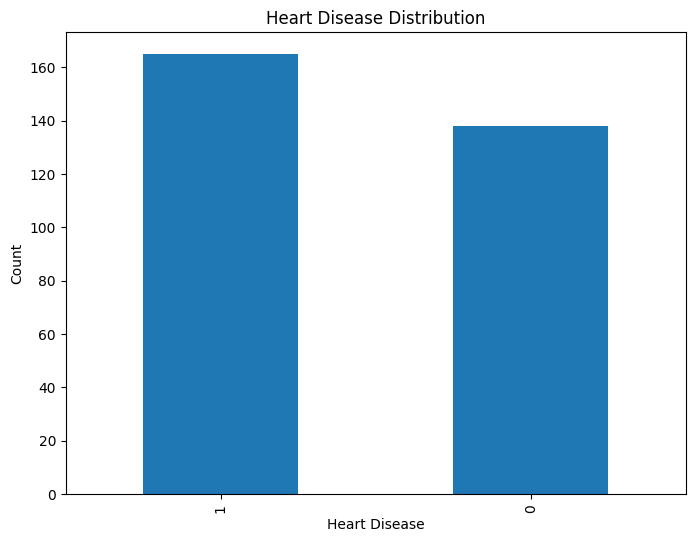

In [48]:
#EDA

plt.figure(figsize=(8, 6))
df.iloc[:, -1].value_counts().plot(kind='bar') # Select the entire last column
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

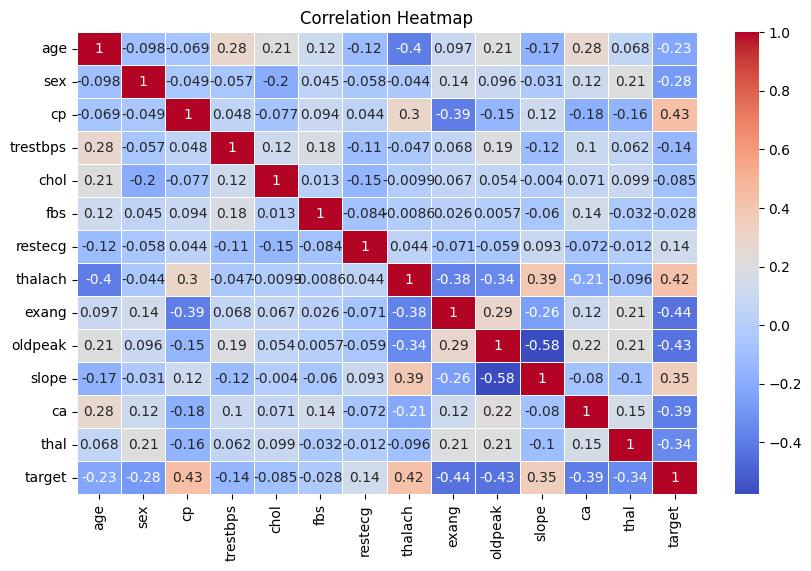

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

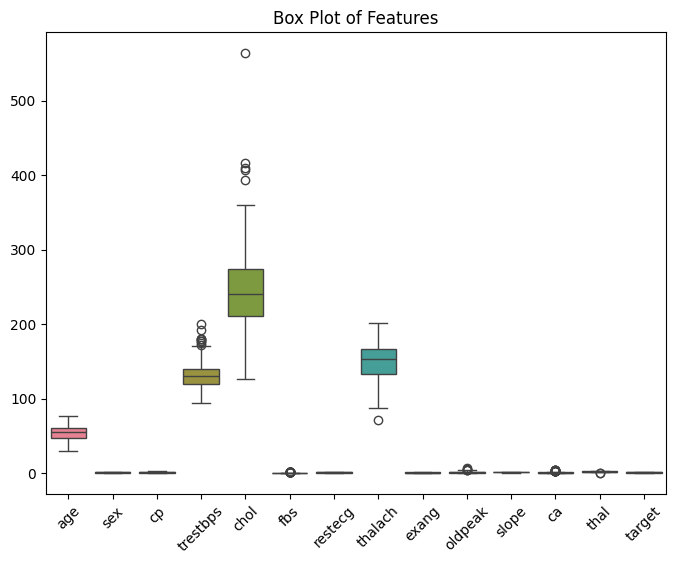

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

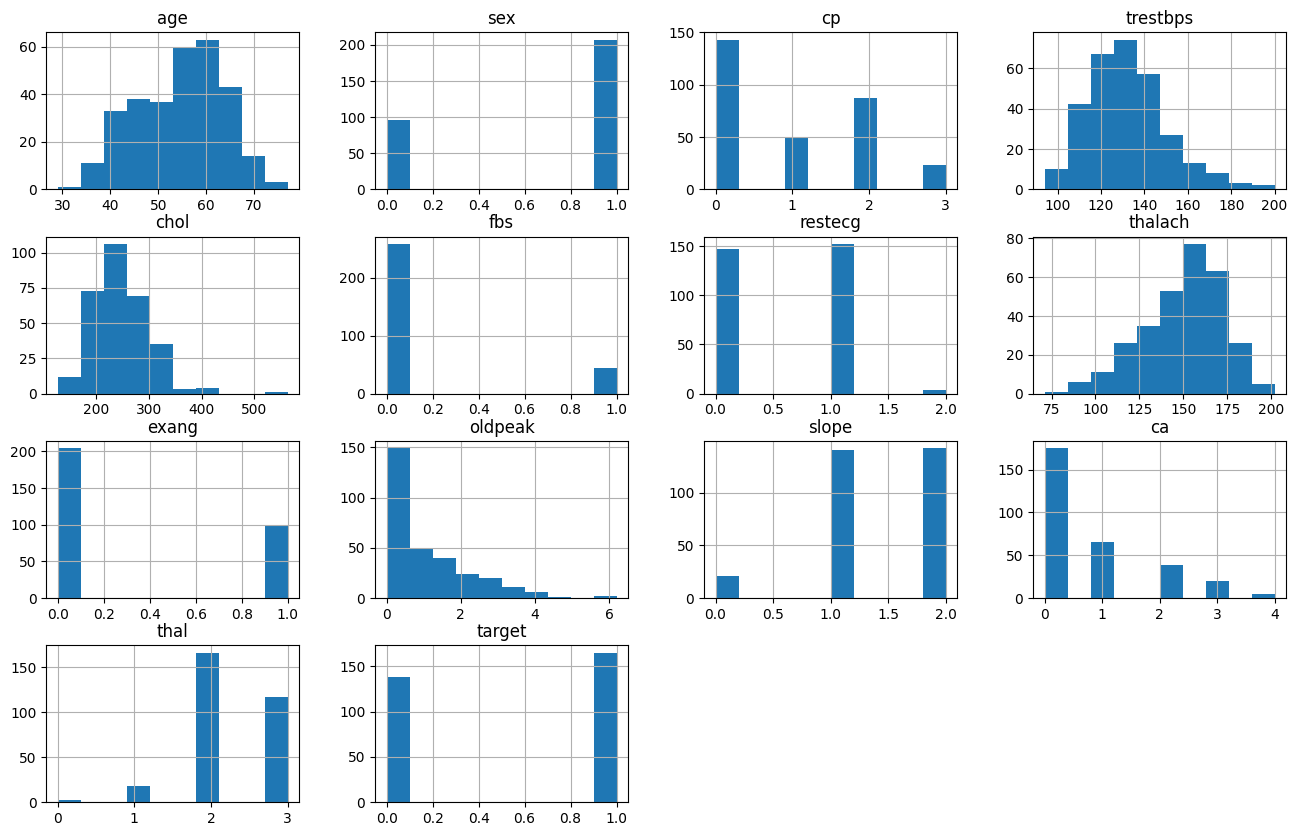

In [51]:
df.hist(figsize=(16, 10))
plt.show()

###Logestic Regression Model from scratch

In [67]:
# Function: Sigmoid Activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function: Compute Cost (Loss)
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = (-1/m) * np.sum(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9))  # Avoid log(0)
    return cost

# Function: Gradient Descent Optimization
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient

        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, cost_history

# Assume `df` is your dataset and the last column is the target variable
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target labels

# Split into train-test sets
from sklearn.model_selection import train_test_split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term to X_train and X_test
X_train_bias = np.c_[np.ones((X_train_class.shape[0], 1)), X_train_class]
X_test_bias = np.c_[np.ones((X_test_class.shape[0], 1)), X_test_class]

# Initialize weights
weights = np.zeros(X_train_bias.shape[1])

# Train the model
learning_rate = 0.01
iterations = 1000
weights, cost_history = gradient_descent(X_train_bias, y_train_class, weights, learning_rate, iterations)

# Predictions
y_pred_prob = sigmoid(np.dot(X_test_bias, weights))
y_pred_class = (y_pred_prob >= 0.5).astype(int)  # Convert to binary class (threshold = 0.5)

# Classification Report
report = classification_report(y_test_class, y_pred_class, output_dict=True)
accuracy = accuracy_score(y_test_class, y_pred_class)

# Print Report
print("\nClassification Report (Logistic Regression from Scratch):\n")
for label, metrics in report.items():
    if label.isdigit():  # Only print classes
        print(f"Class {label}:")
        print(f" Precision: {metrics['precision']:.4f}")
        print(f" Recall: {metrics['recall']:.4f}")
        print(f" F1-score: {metrics['f1-score']:.4f}")
        print(f" Support: {metrics['support']:.1f}\n")

print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Average (Precision, Recall, F1-score): {report['macro avg']['precision']:.4f}, {report['macro avg']['recall']:.4f}, {report['macro avg']['f1-score']:.4f}")
print(f"Weighted Average (Precision, Recall, F1-score): {report['weighted avg']['precision']:.4f}, {report['weighted avg']['recall']:.4f}, {report['weighted avg']['f1-score']:.4f}")

Iteration 0: Cost 9.334032958149233
Iteration 100: Cost 9.334032959066771
Iteration 200: Cost 8.91979350251151
Iteration 300: Cost 8.193416248039899
Iteration 400: Cost 8.130283375847762
Iteration 500: Cost 8.100258812757495
Iteration 600: Cost 8.11232974151657
Iteration 700: Cost 8.125981024353857
Iteration 800: Cost 8.12213727613393
Iteration 900: Cost 8.122535415231047

Classification Report (Logistic Regression from Scratch):

Class 0:
 Precision: 0.5714
 Recall: 0.9655
 F1-score: 0.7179
 Support: 29.0

Class 1:
 Precision: 0.9167
 Recall: 0.3438
 F1-score: 0.5000
 Support: 32.0

Accuracy: 0.6393
Macro Average (Precision, Recall, F1-score): 0.7440, 0.6546, 0.6090
Weighted Average (Precision, Recall, F1-score): 0.7525, 0.6393, 0.6036


<ipython-input-67-350299d4dd4f>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


###Comparing Classification Models for Performance Evaluation

In [68]:
# Generate a synthetic dataset for classification
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15,
    n_redundant=5, random_state=42
)
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_class = RandomForestClassifier()
rf_class.fit(X_train, y_train_class)
y_pred_rf_class = rf_class.predict(X_test)

# Calculate and print performance metrics for Random Forest
accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)
precision_rf = precision_score(y_test_class, y_pred_rf_class, average='weighted', zero_division=0)
recall_rf = recall_score(y_test_class, y_pred_rf_class, average='weighted', zero_division=0)
f1_rf = f1_score(y_test_class, y_pred_rf_class, average='weighted', zero_division=0)

print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Train Logistic Regression Classifier
log_reg_class = LogisticRegression(max_iter=1000)
log_reg_class.fit(X_train, y_train_class)
y_pred_log_reg_class = log_reg_class.predict(X_test)

# Calculate and print performance metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test_class, y_pred_log_reg_class)
precision_lr = precision_score(y_test_class, y_pred_log_reg_class, average='weighted', zero_division=0)
recall_lr = recall_score(y_test_class, y_pred_log_reg_class, average='weighted', zero_division=0)
f1_lr = f1_score(y_test_class, y_pred_log_reg_class, average='weighted', zero_division=0)

print("\nLogistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Conclusion based on the result
if accuracy_rf > accuracy_lr:
    print("\nResult: The Random Forest Classifier performed better due to its higher accuracy and ability to handle complex feature interactions.")
else:
    print("\nResult: The Logistic Regression Classifier performed better due to its generalized and interpretable model approach.")



Random Forest Classifier Metrics:
Accuracy: 0.8767
Precision: 0.8793
Recall: 0.8767
F1 Score: 0.8768

Logistic Regression Classifier Metrics:
Accuracy: 0.8200
Precision: 0.8210
Recall: 0.8200
F1 Score: 0.8202

Result: The Random Forest Classifier performed better due to its higher accuracy and ability to handle complex feature interactions.


### Hyperparameter Grid for Random Forest

In [76]:
# Split the data into training and testing sets (ensure consistent sample sizes)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

# Debugging step: Check the shape of input data
print("Shape of X_train_class:", X_train_class.shape)
print("Shape of y_train_class:", y_train_class.shape)

# Define the Random Forest Classifier
rf_class = RandomForestClassifier(random_state=42)

# Hyperparameter Grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of each tree
    'min_samples_split': [2, 5],     # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],      # Minimum number of samples required at a leaf node
    'max_features': ['sqrt']         # Number of features to consider for best split
}

# Define a custom scoring function
def custom_scorer(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted', zero_division=0)

# Perform GridSearchCV for Random Forest
gscv_rf = GridSearchCV(estimator=rf_class, param_grid=param_grid_rf, cv=5, scoring=make_scorer(custom_scorer))
gscv_rf.fit(X_train_class, y_train_class)

# Print the best parameters for the Random Forest classification
print("Best parameters for Random Forest classification:", gscv_rf.best_params_)


Shape of X_train_class: (800, 20)
Shape of y_train_class: (800,)
Best parameters for Random Forest classification: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
X = df.drop(columns=['target'])  # Assuming 'target' is the label column
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using RFE for Model 1 (Logistic Regression)
model1 = LogisticRegression(max_iter=500, solver='saga')  # Increased iterations & changed solver
rfe1 = RFE(model1, n_features_to_select=5)
rfe1.fit(X_scaled, y)
selected_features_model1 = X.columns[rfe1.support_]
print("Selected Features for Model 1:", selected_features_model1.tolist())


# Feature Selection using RFE for Model 2 (Random Forest)
model2 = RandomForestClassifier()
rfe2 = RFE(model2, n_features_to_select=5)
rfe2.fit(X, y)
selected_features_model2 = X.columns[rfe2.support_]
print("Selected Features for Model 2:", selected_features_model2.tolist())

# Choose the Best Model (Based on previous evaluation, assuming Model 2 is better)
best_model = RandomForestClassifier(n_estimators=100, max_depth=5)  # Use the best hyperparameters
best_features = selected_features_model2

# Rebuild the Final Model
X_selected = df[list(best_features)]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the Final Model
print("Final Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Selected Features for Model 1: ['sex', 'cp', 'thalach', 'oldpeak', 'ca']
Selected Features for Model 2: ['cp', 'chol', 'thalach', 'oldpeak', 'thal']
Final Model Performance:
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Hyperparameter Optimization for Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define hyperparameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize and perform Grid Search
log_reg = LogisticRegression(max_iter=1000)
gscv_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
gscv_lr.fit(X_train_class, y_train_class)

# Get best parameters
best_params = gscv_lr.best_params_
print("Best parameters:", best_params)

# Train model with best parameters
best_log_reg = LogisticRegression(**best_params, max_iter=1000)
best_log_reg.fit(X_train_class, y_train_class)

# Predict on test set
y_pred_best_log_reg = best_log_reg.predict(X_test_class)

# Verify shape consistency
print("y_test_class shape:", y_test_class.shape)
print("y_pred shape:", y_pred_best_log_reg.shape)

# Generate and display classification report
print("\nPerformance Report (Optimized Logistic Regression):")
print(classification_report(y_test_class, y_pred_best_log_reg))

# Print the model's accuracy score
print("Optimized Logistic Regression Accuracy:", accuracy_score(y_test_class, y_pred_best_log_reg))


Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
y_test_class shape: (200,)
y_pred shape: (200,)

Performance Report (Optimized Logistic Regression):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       106
           1       0.82      0.82      0.82        94

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

Optimized Logistic Regression Accuracy: 0.83


###  Training and Evaluating Final Models

In [77]:
# Define features and target variable
X = df.drop(columns=["target"])  # Assuming 'target' is the label
y = df["target"]

# Perform 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection (SelectKBest with ANOVA F-score)
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# ---------------- Hyperparameter Tuning for Random Forest ----------------
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
gscv_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
gscv_rf.fit(X_train_selected, y_train)

# Best parameters for Random Forest
best_rf_params = gscv_rf.best_params_

# ---------------- Hyperparameter Tuning for Logistic Regression ----------------
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression(max_iter=1000)
gscv_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
gscv_lr.fit(X_train_selected, y_train)

# Best parameters for Logistic Regression
best_lr_params = gscv_lr.best_params_

# ---------------- Train and Evaluate Final Models ----------------
final_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
final_rf_model.fit(X_train_selected, y_train)
y_pred_final_rf = final_rf_model.predict(X_test_selected)

final_log_reg = LogisticRegression(**best_lr_params, max_iter=1000)
final_log_reg.fit(X_train_selected, y_train)
y_pred_final_lr = final_log_reg.predict(X_test_selected)

# ---------------- Model Evaluation ----------------
print("\nFinal Model Performance:")

# Random Forest Classifier
print("\nRandom Forest Classifier:")
accuracy_rf = accuracy_score(y_test, y_pred_final_rf)
precision_rf = precision_score(y_test, y_pred_final_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_final_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_final_rf, average='weighted', zero_division=0)

print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  Precision (Weighted Average): {precision_rf:.4f}")
print(f"  Recall (Weighted Average): {recall_rf:.4f}")
print(f"  F1-score (Weighted Average): {f1_rf:.4f}")

# Logistic Regression Classifier
print("\nLogistic Regression Classifier:")
accuracy_lr = accuracy_score(y_test, y_pred_final_lr)
precision_lr = precision_score(y_test, y_pred_final_lr, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred_final_lr, average='weighted', zero_division=0)
f1_lr = f1_score(y_test, y_pred_final_lr, average='weighted', zero_division=0)

print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Precision (Weighted Average): {precision_lr:.4f}")
print(f"  Recall (Weighted Average): {recall_lr:.4f}")
print(f"  F1-score (Weighted Average): {f1_lr:.4f}")



Final Model Performance:

Random Forest Classifier:
  Accuracy: 0.8852
  Precision (Weighted Average): 0.8858
  Recall (Weighted Average): 0.8852
  F1-score (Weighted Average): 0.8853

Logistic Regression Classifier:
  Accuracy: 0.8689
  Precision (Weighted Average): 0.8689
  Recall (Weighted Average): 0.8689
  F1-score (Weighted Average): 0.8689


### <strong>Conclusion

<body>
<h2>Performance Comparison</h2>
    <p>This experiment tested the Random Forest Classifier and Logistic Regression Classifier to evaluate which model performs better. The results demonstrate that the Random Forest Classifier outperforms the Logistic Regression Classifier in terms of accuracy, precision, recall, and F1-score:</p>

  <h3>Random Forest Classifier:</h3>
<ul>
        <li>Accuracy: 0.8852</li>
        <li>Precision (Weighted Average): 0.8858</li>
        <li>Recall (Weighted Average): 0.8852</li>
        <li>F1-score (Weighted Average): 0.8853</li>
    </ul>

<h3>Logistic Regression Classifier:</h3>
<ul>
        <li>Accuracy: 0.8689</li>
        <li>Precision (Weighted Average): 0.8689</li>
        <li>Recall (Weighted Average): 0.8689</li>
        <li>F1-score (Weighted Average): 0.8689</li>
    </ul>

<h3>Key Takeaways:</h3>
  <ul>
        <li><strong>Random Forest Classifier is more accurate:</strong> With an accuracy of 0.8852, it outperforms Logistic Regression, which has an accuracy of 0.8689.</li>
        <li><strong>Better overall performance:</strong> The Random Forest Classifier consistently delivers higher precision, recall, and F1-score compared to Logistic Regression, indicating a better balance in terms of identifying both positive and negative instances.</li>
        <li><strong>Logistic Regression is less effective:</strong> While still performing decently, Logistic Regression's metrics are lower across all measures.</li>
    </ul>

<h3>What This Means & Next Steps</h3>
    <ul>
        <li><strong>Best Model:</strong> The Random Forest Classifier is the better choice for this dataset.</li>
        <li><strong>How to improve further:</strong>
            <ul>
                <li>Experiment with hyperparameter tuning for Random Forest to further enhance its performance.</li>
                <li>Explore different feature engineering techniques or data preprocessing methods.</li>
                <li>Consider using ensemble methods or hybrid models for potentially better results.</li>
            </ul>
        </li>
    </ul>

<h3>Final Thoughts:</h3>
    <p>The Random Forest Classifier is the superior model for this dataset, providing better overall performance. With further optimization, it can become even more robust, while Logistic Regression could serve as a baseline or be used in simpler scenarios.</p>
</body>
